<a href="https://colab.research.google.com/github/Diggi14/project_Property/blob/main/8_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Diggi14/project_Property.git

fatal: destination path 'project_Property' already exists and is not an empty directory.


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/project_Property/model_trainer.csv')

In [ ]:
df.head()

,Unnamed: 0,society,bedRoom,bathroom,balcony,type,sector,Super_build_area,Carpet_area,Study Room,Servant Room,Pooja Room,age,luxury_score,furnishing_type,location_score,area_ratio,price
0,0,maa bhagwati residency,2,2,1,flat,sector 7,1287.000,900.0,0,0,0,relatively new,low,1,27,450.00,0.45
1,1,Apna Enclave,2,2,1,flat,sector 3,929.500,650.0,0,0,0,old property,low,2,34,325.00,0.50
2,2,Tulsiani Easy in Homes,2,2,3,flat,sohna,850.850,595.0,0,0,0,New Property,low,1,25,297.50,0.40
3,3,Smart World Orchard,2,2,2,flat,sector 61,1716.000,1200.0,1,0,0,relatively new,medium,1,51,600.00,1.47
4,4,Parkwood Westend,2,2,3,flat,sector 92,1346.345,941.5,1,0,0,Under Construction,low,1,5,470.75,0.70


In [ ]:
df=df.drop(['Unnamed: 0','area_ratio','society'],axis=1)

In [ ]:
df['balcony'].value_counts()

,count
balcony,
3,665
3+,644
2,604
1,255
0,99


<Axes: xlabel='price', ylabel='Density'>

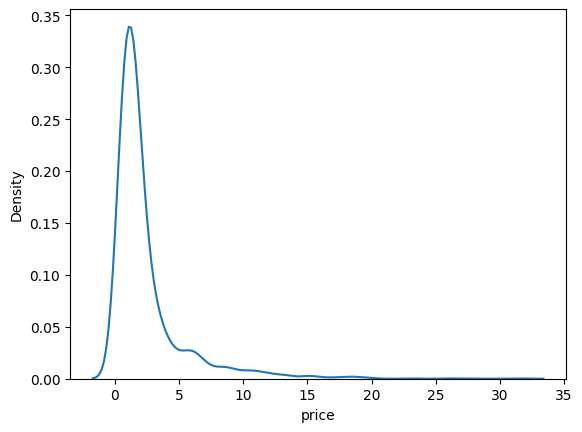

In [ ]:
import seaborn as sns
import numpy as np
sns.kdeplot(x=df['price'])

In [ ]:
y=df['price']
x=df.drop('price',axis=1)

In [ ]:
y=np.log1p(y)

<Axes: xlabel='price', ylabel='Density'>

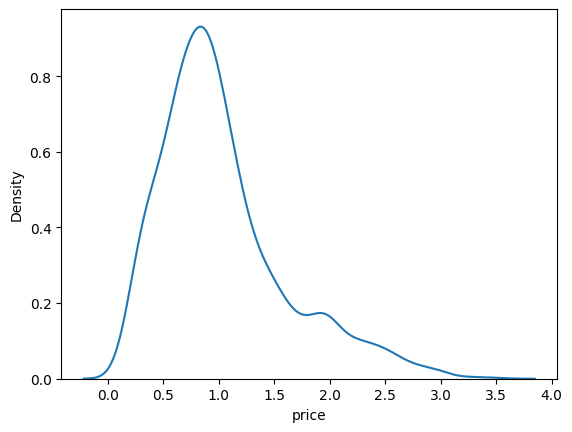

In [ ]:
sns.kdeplot(x=y)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedRoom           2267 non-null   int64  
 1   bathroom          2267 non-null   int64  
 2   balcony           2267 non-null   object 
 3   type              2267 non-null   object 
 4   sector            2267 non-null   object 
 5   Super_build_area  2267 non-null   float64
 6   Carpet_area       2267 non-null   float64
 7   Study Room        2267 non-null   int64  
 8   Servant Room      2267 non-null   int64  
 9   Pooja Room        2267 non-null   int64  
 10  age               2267 non-null   object 
 11  luxury_score      2267 non-null   object 
 12  furnishing_type   2267 non-null   int64  
 13  location_score    2267 non-null   int64  
 14  price             2267 non-null   float64
dtypes: float64(3), int64(7), object(5)
memory usage: 265.8+ KB


In [ ]:
prepreocessing=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),['Pooja Room','Servant Room','Study Room','Carpet_area','furnishing_type','location_score','bedRoom','bathroom']),
        ('cat',OneHotEncoder(handle_unknown='ignore',drop='first'),['type','sector','age','balcony','luxury_score'])
    ],remainder='passthrough'
)

In [ ]:
pipeline=Pipeline([
    ('prepreocessing',prepreocessing),
    ('model',LinearRegression())
])

In [ ]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
score=cross_val_score(pipeline,x,y,cv=kfold,scoring='r2')

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
score.mean(),score.std()

(np.float64(0.8497299368656342), np.float64(0.0164193304601465))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prepreocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Pooja Room', 'Servant Room',
                                                   'Study Room', 'Carpet_area',
                                                   'furnishing_type',
                                                   'location_score', 'bedRoom',
                                                   'bathroom']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type', 'sector', 'age',
                                                   'balcony',
                                                   'luxury_score'])])),
                ('model', LinearRegression())])

In [ ]:
y_pred=pipeline.predict(x_test)

In [ ]:
y_pred=np.expm1(y_pred)

In [ ]:
mean_absolute_error(y_test,y_pred)

1.2674792597990865

In [ ]:
from sklearn.svm import SVR

In [ ]:
pipeline=Pipeline([
    ('prepreocessing',prepreocessing),
    ('model',SVR())
])

In [ ]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
score=cross_val_score(pipeline,x,y,cv=kfold,scoring='r2')

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
score.mean(),score.std()

(np.float64(0.620126689471478), np.float64(0.01836850879165664))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
y_pred=np.expm1(y_pred)
mean_absolute_error(y_test,y_pred)

0.983398693312127